In [54]:
## import a required libraires
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve,auc

In [55]:
#load datasets from csv files
app_history = pd.read_csv("./application_record.csv", encoding = 'utf-8') 
credit_history = pd.read_csv("./credit_record.csv", encoding = 'utf-8')

In [56]:
app_history

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [57]:
credit_history

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [58]:
app_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
ID                     438557 non-null int64
CODE_GENDER            438557 non-null object
FLAG_OWN_CAR           438557 non-null object
FLAG_OWN_REALTY        438557 non-null object
CNT_CHILDREN           438557 non-null int64
AMT_INCOME_TOTAL       438557 non-null float64
NAME_INCOME_TYPE       438557 non-null object
NAME_EDUCATION_TYPE    438557 non-null object
NAME_FAMILY_STATUS     438557 non-null object
NAME_HOUSING_TYPE      438557 non-null object
DAYS_BIRTH             438557 non-null int64
DAYS_EMPLOYED          438557 non-null int64
FLAG_MOBIL             438557 non-null int64
FLAG_WORK_PHONE        438557 non-null int64
FLAG_PHONE             438557 non-null int64
FLAG_EMAIL             438557 non-null int64
OCCUPATION_TYPE        304354 non-null object
CNT_FAM_MEMBERS        438557 non-null float64
dtypes: float64(2), int64(8), object(8)
memory usage: 60.2+ MB


In [59]:
credit_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
ID                1048575 non-null int64
MONTHS_BALANCE    1048575 non-null int64
STATUS            1048575 non-null object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [60]:
#checking to see how many records match in two datasets
len(set(credit_history['ID']).intersection(set(app_history['ID'])))

36457

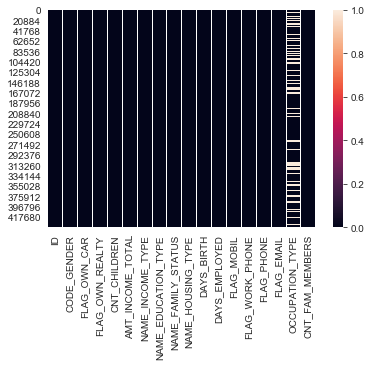

In [61]:
#occupation_type has many null values.
sns.heatmap(app_history.isnull()) 

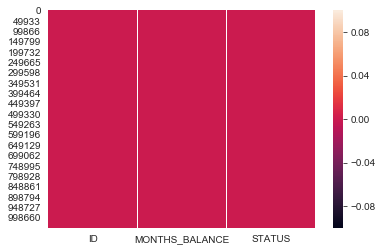

In [62]:
sns.heatmap(credit_history.isnull())

In [63]:
# dropping duplicates from app_history dataset
app_history = app_history.drop_duplicates('ID', keep='last') 

In [64]:
# dropping occupation type which has many null values
app_history.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [65]:
app_history.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 17 columns):
ID                     438510 non-null int64
CODE_GENDER            438510 non-null object
FLAG_OWN_CAR           438510 non-null object
FLAG_OWN_REALTY        438510 non-null object
CNT_CHILDREN           438510 non-null int64
AMT_INCOME_TOTAL       438510 non-null float64
NAME_INCOME_TYPE       438510 non-null object
NAME_EDUCATION_TYPE    438510 non-null object
NAME_FAMILY_STATUS     438510 non-null object
NAME_HOUSING_TYPE      438510 non-null object
DAYS_BIRTH             438510 non-null int64
DAYS_EMPLOYED          438510 non-null int64
FLAG_MOBIL             438510 non-null int64
FLAG_WORK_PHONE        438510 non-null int64
FLAG_PHONE             438510 non-null int64
FLAG_EMAIL             438510 non-null int64
CNT_FAM_MEMBERS        438510 non-null float64
dtypes: float64(2), int64(8), object(7)
memory usage: 60.2+ MB


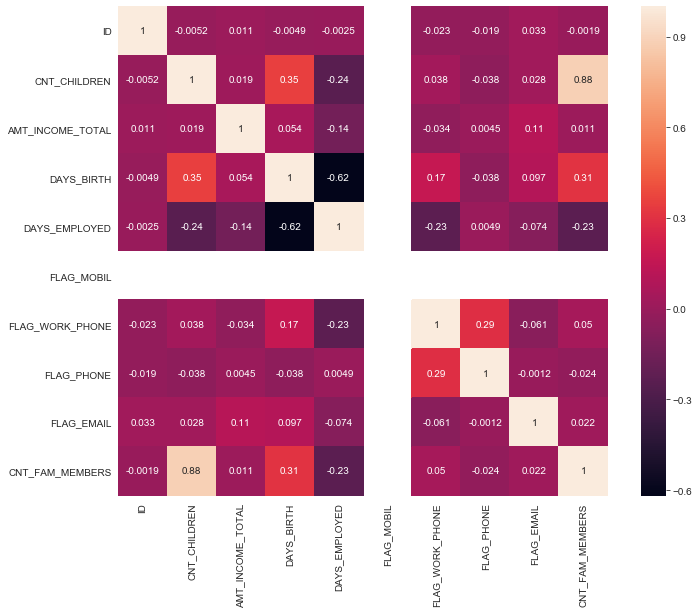

In [66]:
# finding and plotting co-relation matrix
corrmat = app_history.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,  square=True, annot=True);

In [67]:
app_history.drop('FLAG_MOBIL', axis=1, inplace=True)

In [68]:
# finding list of non-numeric attributes
objtype = pd.DataFrame(app_history.dtypes =='object').reset_index()
non_numberic = objtype[objtype[0] == True]['index']
non_numberic

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [69]:
#finding list of numeric attributes
numeric_type = pd.DataFrame(app_history.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
numeric_type = numeric_type[numeric_type['yes/no'] ==True]['index']
numeric_type

0                   ID
4         CNT_CHILDREN
5     AMT_INCOME_TOTAL
10          DAYS_BIRTH
11       DAYS_EMPLOYED
12     FLAG_WORK_PHONE
13          FLAG_PHONE
14          FLAG_EMAIL
15     CNT_FAM_MEMBERS
Name: index, dtype: object

In [70]:
gender = app_history[non_numberic]['CODE_GENDER'].value_counts()
print("--------------------------------------Gender----------------------------------")
print(gender)
car_owner = app_history[non_numberic]['FLAG_OWN_CAR'].value_counts()
print("--------------------------------------Car owner-------------------------------")
print(car_owner);
realty_owner = app_history[non_numberic]['FLAG_OWN_REALTY'].value_counts()
print("--------------------------------------Real estate owner-----------------------")
print(realty_owner);
income_type = app_history[non_numberic]['NAME_INCOME_TYPE'].value_counts()
print("--------------------------------------Income TYpe-----------------------------")
print(income_type);
edu_type = app_history[non_numberic]['NAME_EDUCATION_TYPE'].value_counts()
print("--------------------------------------Education type--------------------------")
print(edu_type);
fam_status = app_history[non_numberic]['NAME_FAMILY_STATUS'].value_counts()
print("-----------------------------------------Family Sttaus-----------------------")
print(fam_status);
hose_type = app_history[non_numberic]['NAME_HOUSING_TYPE'].value_counts()
print("------------------------------------------Housing type-----------------------")
print(hose_type);

--------------------------------------Gender----------------------------------
F    294412
M    144098
Name: CODE_GENDER, dtype: int64
--------------------------------------Car owner-------------------------------
N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64
--------------------------------------Real estate owner-----------------------
Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64
--------------------------------------Income TYpe-----------------------------
Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
--------------------------------------Education type--------------------------
Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64


In [71]:
#convert all non numeric labels to numric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for label in app_history:
    if app_history[label].dtypes=='object':
        app_history[label] = le.fit_transform(app_history[label])
app_history

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,1,0,1,0,135000.0,1,4,2,1,-22717,365243,0,0,0,1.0
438553,6840222,0,0,0,0,103500.0,4,4,3,1,-15939,-3007,0,0,0,1.0
438554,6841878,0,0,0,0,54000.0,0,1,3,5,-8169,-372,1,0,0,1.0
438555,6842765,0,0,1,0,72000.0,1,4,1,1,-21673,365243,0,0,0,2.0


In [72]:
#list nueric data types
app_history[numeric_type].head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,427500.0,-12005,-4542,1,0,0,2.0
1,5008805,0,427500.0,-12005,-4542,1,0,0,2.0
2,5008806,0,112500.0,-21474,-1134,0,0,0,2.0
3,5008808,0,270000.0,-19110,-3051,0,1,1,1.0
4,5008809,0,270000.0,-19110,-3051,0,1,1,1.0


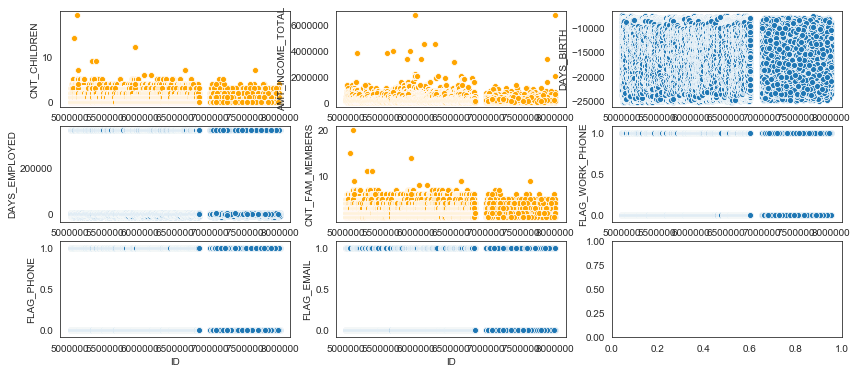

In [73]:
#create scatter plot to detect outliers
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app_history, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app_history, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app_history, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app_history, ax=ax[1][0])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app_history, ax=ax[1][1], color= 'orange')
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app_history, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app_history, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app_history, ax=ax[2][1])


In [74]:
# removing outliers from children count attribute 
high_bound = app_history['CNT_CHILDREN'].quantile(0.999)
low_bound = app_history['CNT_CHILDREN'].quantile(0.001)
app_history = app_history[(app_history['CNT_CHILDREN']>low_bound) & (app_history['CNT_CHILDREN']<high_bound)]

In [75]:
# removing outliers from total ammount income attribute 
high_bound = app_history['AMT_INCOME_TOTAL'].quantile(0.999)
low_bound = app_history['AMT_INCOME_TOTAL'].quantile(0.001)
app_history = app_history[(app_history['AMT_INCOME_TOTAL']>low_bound) & (app_history['AMT_INCOME_TOTAL']<high_bound)]

In [76]:
# removing outliers from total family members attribute 
high_bound = app_history['CNT_FAM_MEMBERS'].quantile(0.999)
low_bound = app_history['CNT_FAM_MEMBERS'].quantile(0.001)
app_history = app_history[(app_history['CNT_FAM_MEMBERS']>low_bound) & (app_history['CNT_FAM_MEMBERS']<high_bound)]

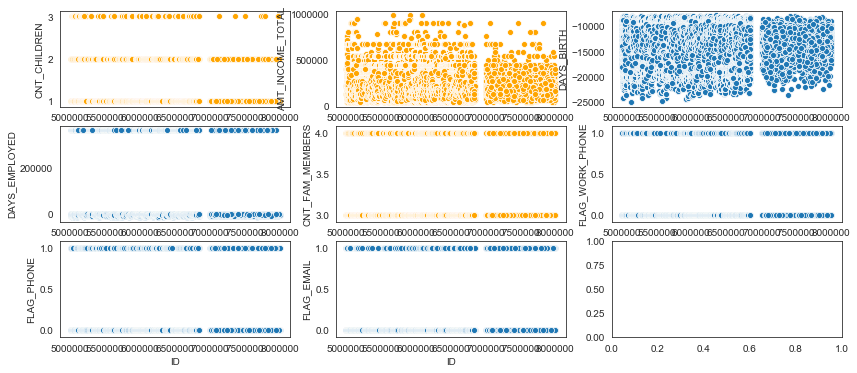

In [77]:
#create scatter plot to detect outliers
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app_history, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app_history, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app_history, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app_history, ax=ax[1][0])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app_history, ax=ax[1][1], color= 'orange')
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app_history, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app_history, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app_history, ax=ax[2][1])



In [78]:
# making months balance postive and sorting based on months from today
credit_history['Months from today'] = credit_history['MONTHS_BALANCE']*-1
credit_history = credit_history.sort_values(['ID','Months from today'], ascending=True)
credit_history.head(10)

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
5,5001712,-1,C,1
6,5001712,-2,C,2
7,5001712,-3,C,3
8,5001712,-4,C,4
9,5001712,-5,C,5


In [79]:
credit_history['STATUS'].value_counts() 

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [80]:
# categorizing status column to binary classified 0 : Good Client and 1 : bad client
credit_history['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
credit_history['STATUS'] = credit_history['STATUS'].astype('int')
credit_history['STATUS'] = credit_history['STATUS'].apply(lambda x:1 if x >= 2 else 0)

In [81]:
# checking presence of minority class in output attribute status
credit_history['STATUS'].value_counts(normalize=True)

0    0.99704
1    0.00296
Name: STATUS, dtype: float64

In [82]:
# Group by ID and keep only maximum of them
credit_history_transformed = credit_history.groupby('ID').agg(max).reset_index()
credit_history_transformed.head() 

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59


In [83]:
# merge the two datasets based on ID
merged_cc_df = app_history.join(credit_history_transformed.set_index('ID'), on='ID', how='inner')
merged_cc_df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
merged_cc_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,0,0,0,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,0,0,0,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,0,0,0,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,0,0,0,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,0,0,0,3.0,0


In [84]:
# updated minority class after merging
merged_cc_df['STATUS'].value_counts(normalize=True)

0    0.984132
1    0.015868
Name: STATUS, dtype: float64

In [85]:
X = merged_cc_df.iloc[:,1:-1] # X value contains all the variables except labels
y = merged_cc_df.iloc[:,-1] # these are the labels

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [87]:
X_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
32214,0,0,1,2,202500.0,4,1,1,1,-13797,-3259,0,1,0,4.0
8444,1,1,1,1,135000.0,4,4,1,1,-20310,-5375,0,0,0,3.0
13717,0,0,1,2,270000.0,0,1,1,1,-15101,-3860,1,0,0,4.0
14626,1,0,1,1,157500.0,4,4,1,1,-12585,-367,0,0,0,3.0
4092,0,0,1,1,180000.0,4,4,1,1,-17686,-8756,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0,0,1,1,135000.0,0,4,0,1,-10765,-2196,0,0,1,3.0
48727,0,1,1,1,225000.0,4,4,0,1,-15443,-290,0,0,0,3.0
23286,0,0,1,1,121500.0,4,4,1,1,-9448,-355,0,0,0,3.0
37214,1,1,0,2,270000.0,4,4,1,1,-15207,-3201,0,0,0,4.0


In [88]:
X_test

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
32599,0,0,0,1,180000.0,0,4,0,2,-10928,-1558,0,0,0,3.0
25368,0,0,1,1,202500.0,4,4,1,1,-14060,-261,0,0,0,3.0
37066,0,0,0,1,387000.0,0,1,1,1,-15220,-727,0,0,0,3.0
25559,1,1,1,1,90000.0,4,4,1,1,-16767,-1477,0,0,0,3.0
22488,0,0,1,2,54000.0,4,4,1,1,-9905,-795,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0,0,1,2,216000.0,2,1,1,1,-15444,-3112,0,0,1,4.0
39757,0,0,0,1,90000.0,4,4,1,1,-16118,-1959,0,1,0,3.0
13879,0,0,1,2,180000.0,2,1,1,1,-11020,-3578,0,0,0,4.0
14512,1,1,1,1,202500.0,4,4,1,1,-19060,-398,1,1,0,3.0


In [89]:
# scaling all features which have a range
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

In [90]:
X_scaled

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,0.0,0.0,1.0,0.5,0.184211,1.0,0.25,0.25,0.2,0.658426,0.029533,0.0,1.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.105263,1.0,1.00,0.25,0.2,0.275984,0.023960,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.5,0.263158,0.0,0.25,0.25,0.2,0.581856,0.027950,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.131579,1.0,1.00,0.25,0.2,0.729595,0.037149,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.157895,1.0,1.00,0.25,0.2,0.430065,0.015056,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,0.0,0.0,1.0,0.0,0.105263,0.0,1.00,0.00,0.2,0.836465,0.032332,0.0,0.0,1.0,0.0
8560,0.0,1.0,1.0,0.0,0.210526,1.0,1.00,0.00,0.2,0.561773,0.037352,0.0,0.0,0.0,0.0
8561,0.0,0.0,1.0,0.0,0.089474,1.0,1.00,0.25,0.2,0.913799,0.037180,0.0,0.0,0.0,0.0
8562,1.0,1.0,0.0,0.5,0.263158,1.0,1.00,0.25,0.2,0.575631,0.029685,0.0,0.0,0.0,1.0


In [91]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train1, y_train1 = oversample.fit_resample(X_scaled, y_train)
X_test1, y_test1 = oversample.fit_resample(X_test_scaled, y_test)

In [92]:
# Original majority and minority class disparity 
y_train.value_counts()

0    8422
1     142
Name: STATUS, dtype: int64

In [93]:
# after using SMOTE 
y_train1.value_counts()

1    8422
0    8422
Name: STATUS, dtype: int64

# LOGISTIC REGRESSION

Accuracy Score is 0.56204
Recall Score is 0.49947
Precision Score is 0.57091


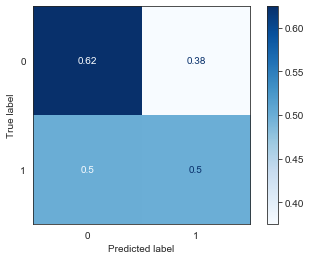

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score,plot_confusion_matrix

class_names = ['0','1']

model = LogisticRegression(C=0.4,
                           solver='lbfgs')
model.fit(X_train1, y_train1)
classifiers = model.fit(X_train1, y_train1)
y_predict = model.predict(X_test1)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_predict)))
#print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 

plot_confusion_matrix(classifiers, X_test1,y_test1,
                       display_labels= class_names,cmap=plt.cm.Blues,normalize = 'true')
                       
                      

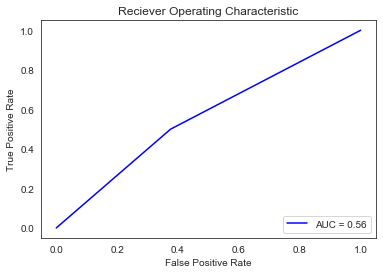

In [95]:
fpr,tpr, thresold = roc_curve(y_test1,y_predict)
roc_auc = auc(fpr,tpr)

plt.title('Reciever Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# DECISION TREE

Accuracy Score is 0.83563
Recall Score is 0.79109
Precision Score is 0.86845
--------------------------
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       943
           1       0.87      0.79      0.83       943

    accuracy                           0.84      1886
   macro avg       0.84      0.84      0.84      1886
weighted avg       0.84      0.84      0.84      1886



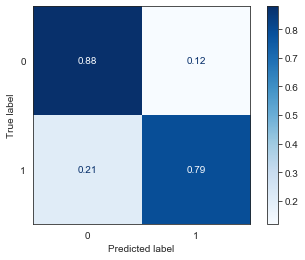

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn import tree



model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8
                               )

model.fit(X_train1, y_train1)
classifiers = model.fit(X_train1, y_train1)
# tree_representation = tree.export_text(model)
# print(tree_representation)
y_predict = model.predict(X_test1)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_predict)))
#print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
print("--------------------------")
print(classification_report(y_test1,y_predict))

plot_confusion_matrix(classifiers, X_test1,y_test1,
                       display_labels= class_names,cmap=plt.cm.Blues,normalize = 'true')
                       
                      
               

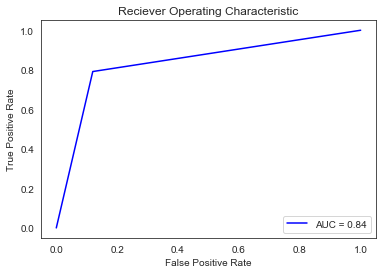

In [97]:
fpr,tpr, thresold = roc_curve(y_test1,y_predict)
roc_auc = auc(fpr,tpr)

plt.title('Reciever Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RANDOM FOREST

[0.04281098 0.0393677  0.09281138 0.03727506 0.1006357  0.12150367
 0.13017311 0.08100631 0.04782595 0.08685122 0.09217197 0.03815032
 0.03980166 0.01717697 0.03243801]
Accuracy Score is 0.92683
Recall Score is 0.8929
Precision Score is 0.95791


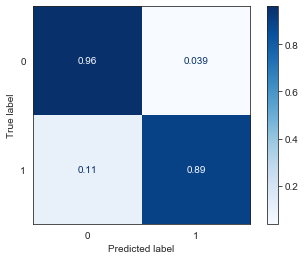

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16)
model.fit(X_train1, y_train1)
classifiers = model.fit(X_train1, y_train1)
print(model.feature_importances_)
y_predict = model.predict(X_test1)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_predict)))
#print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
#plt.barh(data.columns, model.feature_importances_)

plot_confusion_matrix(classifiers, X_test1,y_test1,
                       display_labels= class_names,cmap=plt.cm.Blues,normalize = 'true')
                       
                      

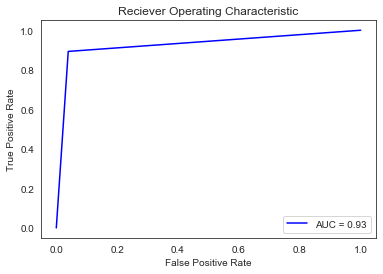

In [99]:
fpr,tpr, thresold = roc_curve(y_test1,y_predict)
roc_auc = auc(fpr,tpr)

plt.title('Reciever Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Support Vector Machine

In [ ]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train1, y_train1)
classifiers = model.fit(X_train1, y_train1)
y_predict = model.predict(X_test1)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_predict)))
#print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 

plot_confusion_matrix(classifiers, X_test1,y_test1,
                       display_labels= class_names,cmap=plt.cm.Blues,normalize = 'true')
                       
                      

In [ ]:
fpr,tpr, thresold = roc_curve(y_test1,y_predict)
roc_auc = auc(fpr,tpr)

plt.title('Reciever Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train1, y_train1)
classifiers = model.fit(X_train1, y_train1)
y_predict = model.predict(X_test1)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_predict)))
#print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 

plot_confusion_matrix(classifiers, X_test1,y_test1,
                       display_labels= class_names,cmap=plt.cm.Blues,normalize = 'true')
                       
                      

In [ ]:
fpr,tpr, thresold = roc_curve(y_test1,y_predict)
roc_auc = auc(fpr,tpr)

plt.title('Reciever Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(X_train1, y_train1)
classifiers = model.fit(X_train1, y_train1)
y_predict = model.predict(X_test1)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_predict)))
#print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 

plot_confusion_matrix(classifiers, X_test1,y_test1,
                       display_labels= class_names,cmap=plt.cm.Blues,normalize = 'true')
                       

In [ ]:
fpr,tpr, thresold = roc_curve(y_test1,y_predict)
roc_auc = auc(fpr,tpr)

plt.title('Reciever Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()